<a href="https://colab.research.google.com/github/brendanpshea/database_sql/blob/main/Database_XX_Exam2_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exam 2 Review

## What is a table? How can I use SELECT and FROM to get data from tables?
A **table** is a structured set of data held in a database, comprised of **rows** and **columns**. The **SELECT** statement allows you to choose which columns you'd like to view, and the **FROM** statement specifies from which table you want to retrieve data.

```sql
SELECT column_name1, column_name2
FROM halloween_costumes;
```

## How can I filter data with WHERE, LIKE, and BETWEEN?
To filter or conditionally select data from a table, you can use the **WHERE** clause. The **LIKE** keyword allows pattern matching using wildcards, typically '%' and '_'. The **BETWEEN** keyword is used to filter the result set within a specific range.

```sql
SELECT costume_name, price
FROM halloween_costumes
WHERE price BETWEEN 10 AND 50
AND costume_name LIKE 'Witch%';
```

## How can I use ORDER BY, LIMIT, and AS to help make my results usable?
The **ORDER BY** keyword is used to sort the result set based on one or more columns, either ascending (ASC) or descending (DESC). The **LIMIT** keyword restricts the number of rows returned. **AS** is used to rename a column or table with an alias.

```sql
SELECT costume_name AS "Outfit", price
FROM halloween_costumes
ORDER BY price DESC
LIMIT 5;
```

## What is an aggregate function? What are some examples?
An **aggregate function** performs a calculation on a set of values and returns a single value. Aggregate functions are often used in conjunction with the **GROUP BY** clause. Examples include **SUM**, **AVG**, **MIN**, **MAX**, and **COUNT**.

```sql
SELECT AVG(price)
FROM halloween_costumes;
```

## How and when do I use COUNT and DISTINCT?
The **COUNT** function returns the number of rows that match a specified criterion. On the other hand, **DISTINCT** is used to remove duplicate values from a result set. When combined, `COUNT(DISTINCT column_name)` will count the number of unique values in a column.

```sql
SELECT COUNT(DISTINCT costume_name)
FROM halloween_costumes;
```

## How do I use AVG, MIN, and MAX? How can I ROUND the results?
The **AVG** function calculates the average of a set of values. **MIN** and **MAX** return the lowest and highest values in a set, respectively. If you want to round the result to a specific number of decimal places, you can use the **ROUND** function.

```sql
SELECT
    ROUND(AVG(price), 2) AS "Average Price",
    MIN(price) AS "Cheapest Costume",
    MAX(price) AS "Most Expensive Costume"
FROM halloween_costumes;
```


## When and how should I use GROUP BY?
The **GROUP BY** clause is used to group rows with the same values in specified columns into summary rows, like "find the number of costumes in each category." It's typically used in conjunction with aggregate functions to group the result set by one or more columns.

```sql
SELECT category, COUNT(*)
FROM halloween_costumes
GROUP BY category;
```

## What are three examples of using GROUP BY with aggregate functions?
1. To find the average price of costumes in each category:

```sql
SELECT category, AVG(price) AS "Average Price"
FROM halloween_costumes
GROUP BY category;
```

2. To determine the highest priced costume in each category:

```sql
SELECT category, MAX(price) AS "Most Expensive"
FROM halloween_costumes
GROUP BY category;
```

3. To count the number of costumes available in each size:

```sql
SELECT size, COUNT(*) AS "Number of Costumes"
FROM halloween_costumes
GROUP BY size;
```

## How can I use HAVING to filter grouped data? How does it differ from WHERE?
The **HAVING** clause is used to filter the results of a **GROUP BY** query based on a condition applied to the aggregated data. While the **WHERE** clause filters rows before they're grouped, **HAVING** filters them after.

```sql
SELECT category, COUNT(*)
FROM halloween_costumes
GROUP BY category
HAVING COUNT(*) > 10;
```

This example would retrieve only the categories that have more than 10 costumes.


## What is a subquery? When should I (not) use them?
A **subquery** is a query nested inside another query. It can be used to retrieve data that will be used in the main query as a condition to further restrict the data that is retrieved. Subqueries can be used in various parts of a query, including the SELECT, FROM, and WHERE clauses. While subqueries can be powerful, they may not always be the most efficient way to retrieve data. Often, a **JOIN** can be used in place of a subquery for better performance. It's advisable not to use subqueries when an equivalent JOIN syntax can be used, as the latter is generally more efficient.

```sql
SELECT costume_name
FROM halloween_costumes
WHERE price > (SELECT AVG(price) FROM halloween_costumes);
```

## When should I use subqueries in the WHERE clause?
Subqueries in the **WHERE** clause can be used to filter records based on some criteria that are calculated on the fly. This is useful when the filtering criteria is not directly available in the main table and needs to be computed or fetched from another table.

```sql
SELECT costume_name, price
FROM halloween_costumes
WHERE category IN (SELECT category FROM costume_categories WHERE popularity_rank < 5);
```

## When should I use subqueries in the FROM clause?
Subqueries in the **FROM** clause are useful when you need to perform operations on data before it gets processed by the main query. This can be helpful for aggregation, filtering, or organizing data in a way that can't be done using the main query alone.

```sql
SELECT tmp.category, AVG(tmp.price) AS "Average Price"
FROM (SELECT category, price FROM halloween_costumes WHERE price > 20) AS tmp
GROUP BY tmp.category;
```

This example first filters costumes that are above a certain price, then calculates the average price for each category.


## What are three types of relationships between tables?
There are primarily three types of relationships between tables in a relational database: **one-to-one**, **one-to-many**, and **many-to-many**.

```sql
-- Example of a one-to-many relationship:
SELECT witch.name, potion.id
FROM witches AS witch
JOIN potions AS potion ON witch.id = potion.brewer_id;
```
| witch.name | potion.id |
|------------|----------|
| Morgana    | 101      |
| Lilith     | 102      |
| Morgana    | 103      |
| Elvira     | 104      |

## Why are many-to-many relationships a problem? How do junction tables solve these?
**Many-to-many** relationships can be problematic in relational databases. **Junction tables** or **link tables** solve this.

```sql
-- Example using a junction table for monsters and their favorite haunted houses:
SELECT M.name, haunted_house.name
FROM monsters M
JOIN monster_hauntings ON M.id = monster_hauntings.monster_id
JOIN haunted_houses AS haunted_house ON haunted_monster_id = monster_hauntings.house_id;
```

monster_hauntings is a junction table:

| monster_id   | house_id        |
|--------------|--------------------|
| 1 | 1      |
| 1      | 2      |
| 2        | 2    |
| 2 | 3   |

## What are the different types of SQL Joins? How do they differ from one another (INNER, LEFT, CROSS)?
SQL **joins** combine rows from two or more tables based on a related column.

```sql
-- INNER JOIN example between vampires and their favorite victims:
SELECT vampire.name, victim.name
FROM vampires AS vampire
INNER JOIN victims AS victim ON vampire.favorite_victim_id = victim.id;
```

| vampire.name | victim.name |
|--------------|-------------|
| Vlad         | Lucy        |
| Carmilla     | John        |

```sql
-- LEFT JOIN example between werewolves and their last seen locations:
SELECT werewolf.name, location.place
FROM werewolves AS werewolf
LEFT JOIN last_seen_locations AS location ON werewolf.id = location.werewolf_id;
```

| werewolf.name | location.place    |
|---------------|-------------------|
| Fenrir        | Forest Clearing   |
| Lupin         | Abandoned Village |
| Romulus       | NULL              |

```sql
-- CROSS JOIN example between zombies and their preferred graveyards:
SELECT zombie.name, graveyard.name
FROM zombies AS zombie
CROSS JOIN graveyards AS graveyard;
```

| zombie.name | graveyard.name  |
|-------------|-----------------|
| Walker      | Peaceful Pines  |
| Risen       | Peaceful Pines  |
| Walker      | Shadowy Meadows |
| Risen       | Shadowy Meadows |



## An example of an INNER JOIN with a WHERE clause:
When you wish to combine two tables and filter the results based on certain criteria, you can use an **INNER JOIN** in conjunction with a **WHERE** clause.

```sql
-- INNER JOIN example between zombies and their attacks, filtered for attacks in the 'Graveyard' location:
SELECT zombie.name, attack.location, attack.date
FROM zombies AS zombie
INNER JOIN attacks AS attack ON zombie.id = attack.zombie_id
WHERE attack.location = 'Graveyard';
```
| zombie.name | attack.location | attack.date  |
|-------------|-----------------|--------------|
| Walker      | Graveyard       | 2023-10-31  |
| Risen       | Graveyard       | 2023-10-30  |

## An example of an INNER JOIN with an aggregate function:
To derive aggregated data from two tables, you can use an **INNER JOIN** along with an aggregate function.

```sql
-- INNER JOIN example between ghosts and their hauntings, counting the number of hauntings per ghost:
SELECT ghost.name, COUNT(haunting.id) AS "Number of Hauntings"
FROM ghosts AS ghost
INNER JOIN hauntings AS haunting ON ghost.id = haunting.ghost_id
GROUP BY ghost.name;
```
| ghost.name | Number of Hauntings |
|------------|---------------------|
| Casper     | 5                   |
| Phantasma  | 8                   |

## An example of an INNER JOIN with a subquery:
Subqueries can be incorporated with **INNER JOIN** to derive more complex data relations.

```sql
-- INNER JOIN example between witches and potions, selecting only witches who've brewed a 'Love Potion':
SELECT witch.name, potion.name
FROM witches AS witch
INNER JOIN (
    SELECT brewer_id, name
    FROM potions
    WHERE name = 'Love Potion'
) AS potion ON witch.id = potion.brewer_id;
```
| witch.name | potion.name  |
|------------|--------------|
| Morgana    | Love Potion  |
| Elvira     | Love Potion  |



## What is the difference between conceptual modeling (Business rules and ERDs) and physical modeling (selecting DBMS and writing SQL)?
**Conceptual modeling** involves abstractly defining the structure and organization of data without focusing on its physical implementation. This stage involves defining **business rules** and creating **Entity-Relationship Diagrams (ERDs)**. It represents the high-level view of the organizational data, often devoid of technical specifications.

On the other hand, **physical modeling** involves translating the conceptual representation into a technical one. At this stage, specific technologies, such as the choice of **DBMS**, are decided upon, and the actual database is built using **SQL**. It pertains to the actual storage, retrieval, update, and deletion of data in the database system.


## What are the rules for writing good business rules?
**Business rules** define the operations, definitions, and constraints that apply to an organization in achieving its goals. Here are some guidelines for formulating effective business rules:

1. **Clarity**: Each rule should be clear and unambiguous.
2. **Consistency**: Rules shouldn't contradict each other.
3. **Completeness**: Cover all necessary aspects without leaving gaps.
4. **Relevance**: Ensure rules are pertinent to the business's goals.
5. **Simplicity**: Avoid unnecessary complexity; be concise.
6. **Flexibility**: Rules should be able to adapt to changing business conditions.

## How can I create a Chen ERD? A crow's foot ERD?
**Entity-Relationship Diagrams (ERDs)** visually represent the logical structure of databases.

- **Chen ERD**: Proposed by Peter Chen in the 1970s, this notation uses rectangles to represent entities and diamonds to represent relationships. Attributes are denoted by ovals and are connected to their respective entities or relationships with straight lines.

- **Crow's Foot ERD**: This is a more contemporary notation and is often considered more intuitive. Entities are represented by rectangles. The relationships are denoted using lines between entities. The "crow's foot" symbols (three-pronged fork) at the end of a line represent the "many" side of a relationship, while a straight line represents the "one" side.

For both ERD types, understanding the business rules and the nature of the data is crucial. Begin by identifying entities, then determine how they're related, and finally, add the attributes.



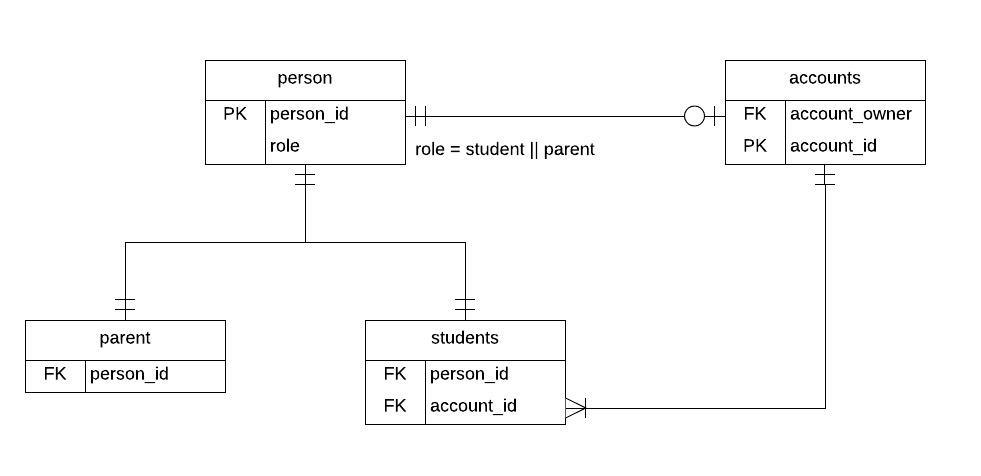

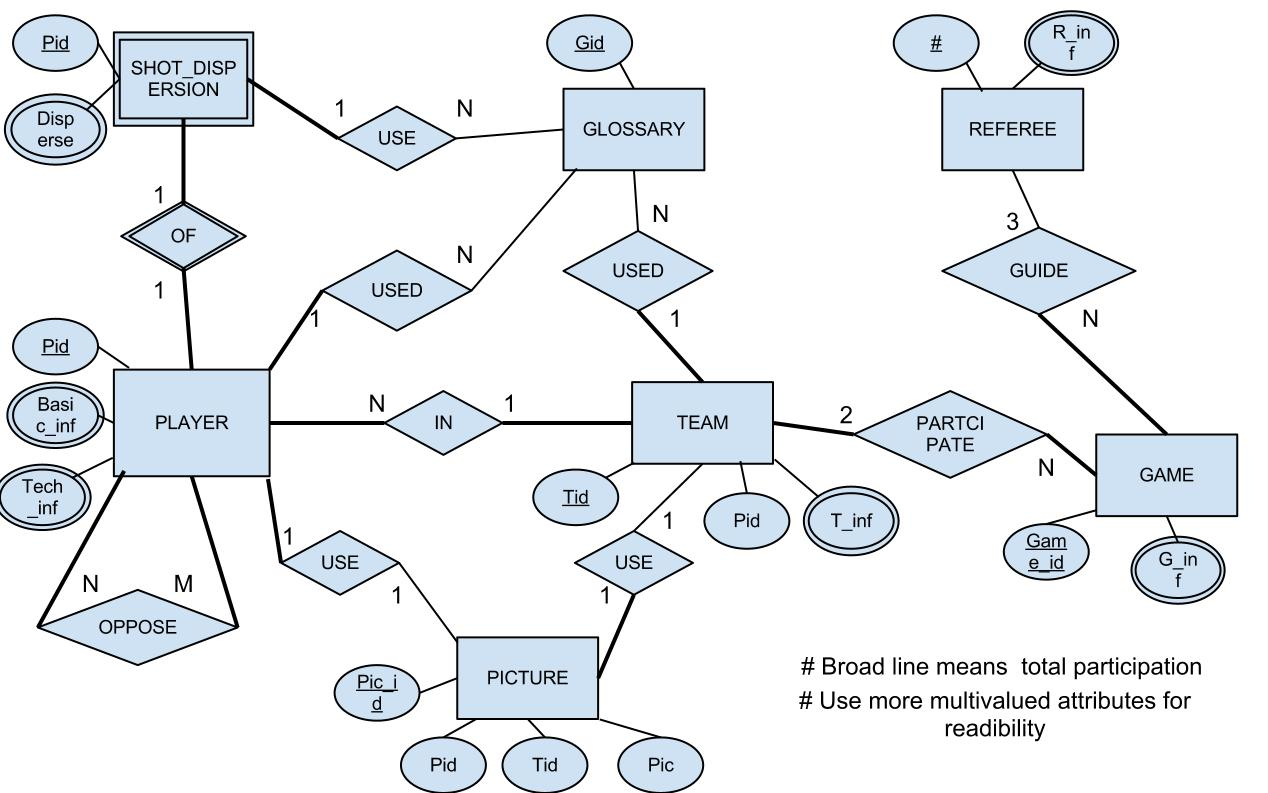

## What is database normalization? What's the point?
**Database normalization** is a systematic process used to organize a relational database into smaller, more manageable tables without redundant data. The primary objectives are:

1. To eliminate data redundancy.
2. To ensure data integrity and accuracy.
3. To optimize the structure for querying and reporting.

By minimizing redundancy, normalization reduces the risk of data anomalies and inconsistencies, ensuring that the database remains efficient, consistent, and easy to maintain.

## What is First Normal Form?
A table is in the **First Normal Form (1NF)** if:

1. It only contains atomic (indivisible) values; there are no repeating groups or arrays.
2. Each column contains values of a single type.
3. All entries in a column are of the same kind.
4. Each column has a unique name.
5. The order in which data is stored does not matter.

For instance, a table that lists multiple phone numbers for a contact in a single column would violate 1NF. Each phone number should be in its separate row.

## What is Second Normal Form?
A table is in the **Second Normal Form (2NF)** if:

1. It is already in 1NF.
2. All non-key attributes are fully functionally dependent on the primary key. This means there's no partial dependency of any column on the primary key.

This typically involves separating the data into additional tables and establishing relationships between them using foreign keys.

## What is Third Normal Form?
A table is in the **Third Normal Form (3NF)** if:

1. It is already in 2NF.
2. All attributes not part of the primary key are functionally dependent only on the primary key, and not on any other non-key attributes.

In simpler terms, 3NF ensures that non-key columns are dependent on the primary key and nothing else. Redundant data gets separated into different tables to achieve this form.



## (Review) What is a primary key? Why are they important in relational databases?
A **primary key** is a unique identifier for a record in a table. It ensures that each record in the table is uniquely identifiable, thereby preventing duplicate records. In relational databases, primary keys are essential for:

1. Ensuring data integrity by uniquely identifying each row.
2. Establishing relationships between tables through foreign keys.
3. Facilitating efficient querying and data retrieval.

For instance, in a table of monsters, each monster might have a unique monster ID that acts as the primary key.

## What makes for a good key? Why are many keys "artificial" rather than "natural"?
A good key should be:

1. Unique: Each record should have a distinct key value.
2. Static: The key value shouldn't change over time.
3. Compact: It should be as small as possible, typically an integer or short string.
4. Anonymous: It shouldn't reveal information about the record.

While **natural keys** (keys based on existing data in the database, like an email address or Social Security Number) can sometimes serve as primary keys, they often fail the criteria mentioned. For instance, email addresses can change, leading to potential issues. This is why **artificial keys** (also known as surrogate keys) are preferred. These are typically auto-generated, like a sequential integer ID, ensuring they're unique, static, and anonymous.

## How do I use CREATE table to make my tables with primary keys, foreign keys, and constraints?
Using the **CREATE TABLE** statement, you can define tables, their columns, and various constraints including primary and foreign keys. Here's an example:

```sql
-- Creating a table 'witches' with a primary key:
CREATE TABLE witches (
    witch_id INT PRIMARY KEY,
    name VARCHAR(255) NOT NULL,
    age INT,
    specialty VARCHAR(255)
);

-- Creating a table 'potions' with both a primary key and a foreign key linking to 'witches':
CREATE TABLE potions (
    potion_id INT PRIMARY KEY,
    name VARCHAR(255) NOT NULL,
    brewer_id INT,
    CONSTRAINT fk_brewer FOREIGN KEY (brewer_id) REFERENCES witches(witch_id)
);
```

In this example, `witch_id` is the primary key for the 'witches' table, and `potion_id` is the primary key for the 'potions' table. The 'potions' table also contains a foreign key, `brewer_id`, which establishes a relationship with the 'witches' table.



## How do I INSERT data?
To add new records to a table, you use the **INSERT INTO** statement. You can specify both the column names and the values to be inserted.

```sql
-- Inserting a new record into the 'witches' table:
INSERT INTO witches (witch_id, name, age, specialty)
VALUES (1, 'Morgana', 400, 'Transformation');
```

If you're inserting values into every column in the table in order, you can omit the column names:

```sql
INSERT INTO witches
VALUES (2, 'Lilith', 500, 'Potion brewing');
```

## How do I UPDATE data?
To modify existing records, use the **UPDATE** statement combined with the **SET** clause to specify the columns and new values. A **WHERE** clause determines which records to update.

```sql
-- Updating the age of 'Morgana' in the 'witches' table:
UPDATE witches
SET age = 401
WHERE name = 'Morgana';
```

## How do I DELETE or DROP data? What does CASCADE mean?
To remove records from a table, use the **DELETE** statement. A **WHERE** clause specifies which records to delete.

```sql
-- Deleting the record of 'Lilith' from the 'witches' table:
DELETE FROM witches
WHERE name = 'Lilith';
```

If you wish to remove an entire table structure and its data, use the **DROP TABLE** statement:

```sql
DROP TABLE witches;
```

The **CASCADE** option is used when there are foreign key constraints. When you try to delete a record that's referenced in another table, the database will prevent it to maintain data integrity. However, using **CASCADE** will delete the referencing records in the foreign table as well, ensuring that no orphaned records remain.

For instance, if you have a 'potions' table with a foreign key referencing 'witches', and you try to delete a witch who has brewed potions:

```sql
DELETE FROM witches
WHERE name = 'Morgana'
CASCADE;
```

This will delete 'Morgana' and all potions she has brewed from the 'potions' table.



## What are subtypes and supertypes? (isA, inheritance, etc.)?
In data modeling, **supertypes** and **subtypes** provide a mechanism to represent inheritance, allowing for the capture of similarities and differences among entities. The **supertype** is a generalized entity representing the shared characteristics of its subtypes. **Subtypes** are specialized versions of an entity. This relationship is also known as **isA** or inheritance.

For instance, consider an entity 'Creature' as a supertype. 'Vampire', 'Werewolf', and 'Ghost' can be subtypes, inheriting common attributes from 'Creature' but also having their unique attributes.

## What is the difference between mandatory/optional subtypes? Between overlapping/disjoint subtypes?
- **Mandatory vs. Optional Subtypes**: If every instance of the supertype must be an instance of at least one subtype, the subtypes are termed **mandatory**. If it's permissible for a supertype instance not to belong to any subtype, then the subtypes are **optional**.

- **Overlapping vs. Disjoint Subtypes**: **Overlapping subtypes** mean an instance of a supertype could be an instance of two (or more) subtypes simultaneously. In **disjoint subtypes**, an instance of a supertype can belong to only one subtype.

For instance, a 'Creature' could be both a 'Vampire' and a 'Werewolf' in an overlapping subtype scenario but only one or the other in a disjoint subtype scenario.

## How are subtype/supertype relationships implemented in modern DBMSs (like Postgres or Oracle)? How would I handle them in databases like SQLite?
In modern DBMSs like **Postgres** or **Oracle**, subtype/supertype relationships can be implemented using:

- **Table Inheritance**: This involves creating a table for the supertype and separate tables for each subtype. The subtype tables inherit columns from the supertype table.

```sql
-- In Postgres:
CREATE TABLE Creature (id INT PRIMARY KEY, name VARCHAR(255));
CREATE TABLE Vampire (fang_length INT) INHERITS (Creature);
```

- **Foreign Key with Supertype**: Create a table for the supertype and subtype with the subtype having a foreign key to the supertype.

In databases like **SQLite** which don't support table inheritance:

- **Single Table Inheritance**: Use one table for both the supertype and subtype, with nullable columns for attributes that don't pertain to every subtype.
- **Class Table Inheritance**: Use separate tables for the supertype and each subtype. The subtype tables would have a foreign key linking back to the supertype.

```sql
-- In SQLite:
CREATE TABLE Creature (id INT PRIMARY KEY, name VARCHAR(255), fang_length INT);
-- OR
CREATE TABLE Creature (id INT PRIMARY KEY, name VARCHAR(255));
CREATE TABLE Vampire (creature_id INT, fang_length INT, FOREIGN KEY (creature_id) REFERENCES Creature(id));
```

Implementing these relationships requires careful planning to ensure data integrity and to optimize querying.



## When should I use a modern spreadsheet (like Excel or Google Sheets)?
**Spreadsheets**, such as **Excel** or **Google Sheets**, are best suited for:

1. **Small to Medium Datasets**: They handle thousands of rows reasonably well, but aren't designed for very large datasets or for complex, repeated queries.
2. **Ad-hoc Analysis**: Quick and dirty data analysis, pivot tables, chart creation, and basic statistics.
3. **Data Entry and Manipulation**: They offer a user-friendly interface for manual data entry, editing, and manipulation. However, they don't offer the **ACID** guarantees that come with relational databases.
4. **Collaboration**: Especially with tools like Google Sheets, where multiple users can edit a spreadsheet simultaneously. (Again, though, no ACID guarantees to prevent inconsistencies).
5. **Learning and Education**: They're great for teaching basic data concepts, formulas, and data visualization.

However, they lack the robust data integrity, security, and querying capabilities of databases. Spreadsheets aren't appropriate for internal software/application data storage (where SQLite excels) or for storing large-scale business data (where Oralce, SQL Server, Postgres, etc. should be used).

Another popular option at this level is **Microsoft Access**, which is a "personal database" desiged for individuals or small business. It's interface is reminiscent of Excel, though it supports SQL as well.

## When should I use a database engine like SQLite?
**SQLite** is a lightweight, serverless, self-contained SQL database engine. Opt for SQLite when:

1. **Portability is Key**: SQLite is a file-based database, making it easy to share or integrate into applications. If you are writing applications using Python or Java, you can easily bundle SQLite "within" your application.
2. **Limited Resources**: Suitable for embedded applications, mobile apps, or desktop software where a full-fledged RDBMS would be overkill.
3. **Read-Intensive Workloads**: SQLite handles read operations faster than write operations.
4. **Temporary or Test Databases**: It's ideal for prototyping or testing due to its simplicity.
5. **Single User Applications**: Not designed for multi-user applications or concurrent write operations.

While powerful for specific scenarios, SQLite lacks certain features found in full RDBMS, like right outer joins or full ALTER TABLE support.

## When should I use a full-fledged RDBMS like Postgres or Oracle?
Clietn-server **Relational Database Management Systems (RDBMS)** like **Postgres**, **Microsoft SQL Server**, or **Oracle** are suitable for:

1. **Large Datasets**: They can handle vast amounts of data (millions to billions of rows) efficiently.
2. **Concurrency**: Designed to handle multiple users and concurrent operations.
3. **Complex Queries**: Advanced SQL querying, stored procedures, and views are supported.
4. **Data Integrity**: They offer robust data validation and ensure ACID (Atomicity, Consistency, Isolation, Durability) properties.
5. **Security**: Advanced security features, user roles, permissions, and encryption.
6. **Scalability and Performance**: Capabilities for replication, partitioning, and optimization.
7. **Extensibility**: Support for custom data types, operators, or functions.

Opt for an RDBMS when the application requires robustness, scalability, and advanced features that go beyond the capabilities of spreadsheets or lightweight databases. However, these databases require more set up and system resources, as well as more specialized training. They usually aren't needed for single-user projects or applications.

